# Task 6 - Graduate Rotational Internship Program (GRIP - May 2021) organised by The Sparks Foundation

# Author : Urvashi Mainekar (Intern - May 2021)

#### Question: Create a decision tree classifier and visualize it graphically

### Aim: To create a decision tree model that uses the data fed into it, to classify the objects into the correct categories and visualizing that model.

#### Procedure:

1) Loading data into python

2) Data pre-processing (Summary stats, info, checking for missing values, etc)

3) Importing all required libraries

4) Splitting the data into predictors and targets and then into training and testing sets

5) Building a preliminary model

6) Cost complexity pruning using cross validation

7) Mean accuracy and standard deviation for each value of alpha (dataframe and graph)

8) Building and fitting the final model

9) Classification Report and Confusion Matrix Graph

10) Decision Tree Visualization

### 1 - Loading data into python

In [1]:
## Loading the data into python
## importing libraries
import pandas as pd

# Forming the iris dataframe
IrisData=pd.read_csv('C:/Users/Urvashi Mainekar/Downloads/Iris.csv')
IrisData.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


###### The Iris Dataset contains four features (length and width of sepals and petals) of 50 samples of three species of Iris (Iris setosa, Iris virginica and Iris versicolor).

### 2 - Data pre-processing

In [2]:
# Summary Stats
print("Shape of the data",IrisData.shape)
IrisData.describe()

Shape of the data (150, 6)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [3]:
IrisData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


##### Checking for missing values

In [4]:
IrisData.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [5]:
IrisData.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### 3 - Importing required libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as sm
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix

### 4 - Splitting the data

In [7]:
X = IrisData.drop(['Id','Species'], axis=1) # features / predictors
y = IrisData.Species # target data

In [8]:
print("Features\n", X.head())
print("Target\n", y.head())

Features
    SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2
Target
 0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object


##### Training and testing sets

In [9]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [10]:
# shape of the data
print("shape of the training data", X_train.shape)
print("shape of the testing data", X_test.shape)

shape of the training data (112, 4)
shape of the testing data (38, 4)


### 5 - Building a preliminary model

In [11]:
# A preliminary model which will be used to find ccp_alpha values for pruning
dt_model = DecisionTreeClassifier(random_state=0)

### 6 - Cost complexity pruning using cross validation

###### Decision Trees most often tend to overfit to the training dataset. There are a lot of parameters like max_depth and min_samples, that are designed to reduce overfitting. However, pruning a tree with cost complexity pruning cam simplify the whole process of finding a smaller tree that improves accuracy with the testing data. To prune a decision tree we need to find the right value for the pruning parameter alpha which controls how little or how much pruning happens.

###### Extracting the different values of alpha available for this tree

In [12]:
path = dt_model.cost_complexity_pruning_path(X_train, y_train) # determine different values for alpha
ccp_alphas = path.ccp_alphas # extract different values for alpha
ccp_alphas = ccp_alphas[:-1] # excluding the maximum value for alpha
print(ccp_alphas)

[0.         0.00714286 0.00869361 0.04942085 0.25081098]


###### Building a pruned tree for each value of alpha and finding it's cross_val_score:

Using different training and testing sets with the same alpha sometimes results in different accuracies, suggesting that alpha is sensitive to the dataset. So, instead of selecting a single training dataset and single testing dataset, we use cross validation to find the optimal value for ccp_alpha

In [13]:
# for each value of alpha we will run 5 fold cross validation.
# then we will store the mean and standard deviation of the scores (accuracy score) for each call to cross_val_score in a list

alpha_loop_values = []

for ccp_alpha in ccp_alphas:
    dt_model = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    scores = cross_val_score(dt_model, X_train, y_train, cv=5)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])

### 7 - Mean accuracy and standard deviation for each value of alpha

In [14]:
alpha_loop_values

[[0.0, 0.9462450592885375, 0.04470773335075959],
 [0.007142857142857141, 0.9462450592885375, 0.04470773335075959],
 [0.008693609022556384, 0.9462450592885375, 0.04470773335075959],
 [0.049420849420849434, 0.9019762845849802, 0.06524253916873193],
 [0.2508109801530854, 0.8383399209486166, 0.08932631429957412]]

In [15]:
# graph of the means and SDs of the scores for each value of alpha
results = pd.DataFrame(alpha_loop_values,
                      columns= ['alpha','mean_accuracy','SD'])
results

,alpha,mean_accuracy,SD
0,0.000000,0.946245,0.044708
1,0.007143,0.946245,0.044708
2,0.008694,0.946245,0.044708
3,0.049421,0.901976,0.065243
4,0.250811,0.838340,0.089326


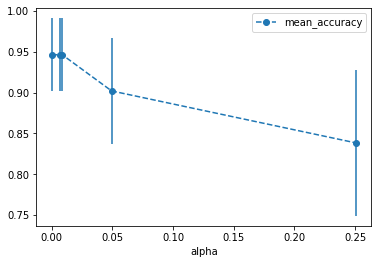

In [16]:
results.plot(x='alpha',
            y='mean_accuracy',
            yerr='SD',
            marker = 'o',
            linestyle ='--')

In [17]:
ideal_ccp_alpha = results[(results['alpha'] >= 0.0)
                         &
                         (results['alpha'] < 0.015)]['alpha']
ideal_ccp_alpha

0    0.000000
1    0.007143
2    0.008694
Name: alpha, dtype: float64

###### As we can see from above graph and dataframe, there are 3 ideal alpha values. In other words, even if we decide to prune (reduce the size of our tree) a little, the accuracy of the predictions won't be affected. 

### 8 - Building and fitting the final model

In [18]:
# Building and training a new decision tree model using the value for alpha
dt_model_pruned = DecisionTreeClassifier(random_state=0, ccp_alpha=0.008)
dt_model_pruned = dt_model_pruned.fit(X_train, y_train)

In [19]:
y_pred = dt_model_pruned.predict(X_test)

### 9 - Classification Report and Confusion Matrix Graph

In [20]:
# classification report
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38



###### Overall Accuracy

In [21]:
accuracy = sm.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100, "%")

Accuracy: 97.36842105263158 %


######  confusion matrix plot

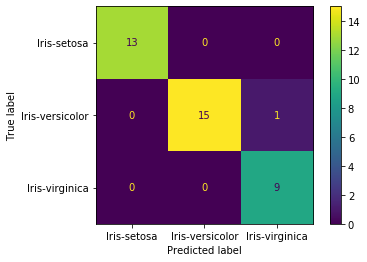

In [22]:
plot_confusion_matrix(dt_model_pruned,
                     X_test,
                     y_test)

###### Interpreting the confusion matrix plot: 
Of the 13 Iris in the testing data that belonged to the setosa species, all 13 were correctly classified. Of the 15+1=16 Iris in the testing data that belonged to the versicolor species, 15 were correctly classified but 1 was wrongly classified as virginica. Of the 9 Iris in the testing data that belonged to the virginica species, all 9 were correctly classified.

### 10 - Decision Tree Visualization

[Text(313.875, 366.93, 'PetalWidthCm <= 0.8\ngini = 0.665\nsamples = 112\nvalue = [37, 34, 41]\nclass = Iris-virginica'),
 Text(209.25, 285.39, 'gini = 0.0\nsamples = 37\nvalue = [37, 0, 0]\nclass = Iris-setosa'),
 Text(418.5, 285.39, 'PetalWidthCm <= 1.65\ngini = 0.496\nsamples = 75\nvalue = [0, 34, 41]\nclass = Iris-virginica'),
 Text(209.25, 203.85000000000002, 'PetalLengthCm <= 4.95\ngini = 0.193\nsamples = 37\nvalue = [0, 33, 4]\nclass = Iris-versicolor'),
 Text(104.625, 122.31, 'gini = 0.0\nsamples = 32\nvalue = [0, 32, 0]\nclass = Iris-versicolor'),
 Text(313.875, 122.31, 'gini = 0.32\nsamples = 5\nvalue = [0, 1, 4]\nclass = Iris-virginica'),
 Text(627.75, 203.85000000000002, 'PetalLengthCm <= 4.85\ngini = 0.051\nsamples = 38\nvalue = [0, 1, 37]\nclass = Iris-virginica'),
 Text(523.125, 122.31, 'SepalWidthCm <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]\nclass = Iris-virginica'),
 Text(418.5, 40.77000000000004, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]\nclass = Iris-vir

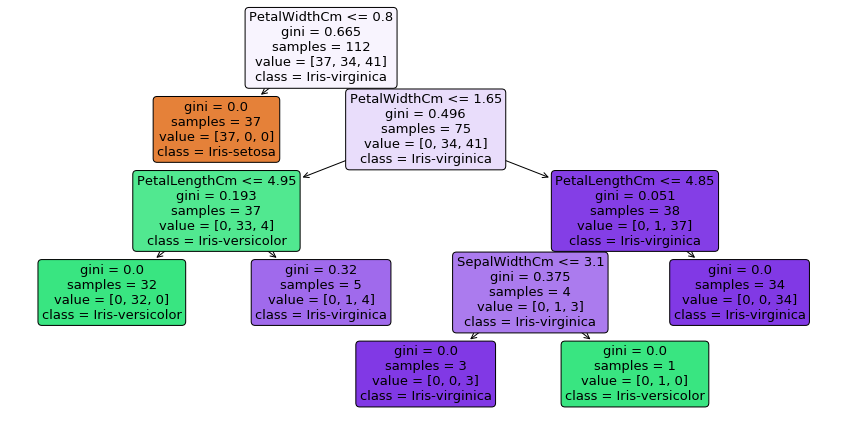

In [23]:
plt.figure(figsize=(15,7.5))
plot_tree(dt_model_pruned,
         filled=True,
         rounded=True,
         class_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],
         feature_names=X.columns)

## -------------------------------------------x-----------------------------------------------